가중치 매개변수의 기울기를 효율적으로 계산

계산그래프 : 각각의 계산 과정을 저장, 역전파를 통한 미분을 효율적으로 계산
  - 노드
  - 에지 : 노드와 노드사이를 연결

In [1]:
# 사과 1개, 100원  2개  200 부과세 10%  220원

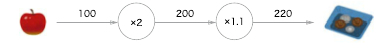

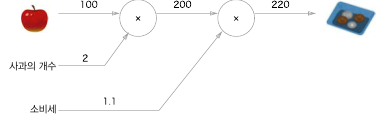

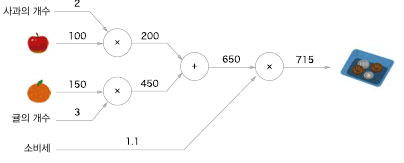

국소적 계산통한 국소적 미분

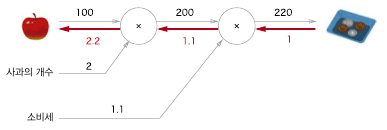

연쇄법칙(chain rule) - 그래프상의 역전파와 동일

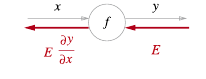

y=f(x) = x**2  --> 2x

합성함수
  - 여러개의 함수로 이루어진 최종함수

In [ ]:
# z = (x + y)**2
# z = T**2
# T = x + y

# x에대한 z의 미분

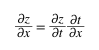

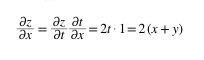

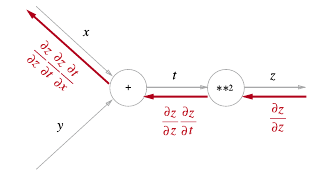

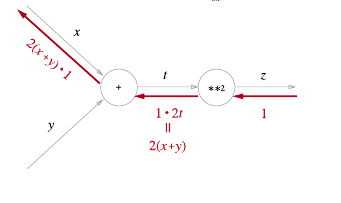

덧셈노드의 역전파

In [ ]:
#  z = x + y

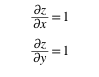

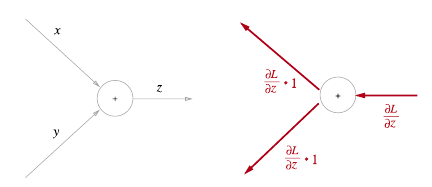

덧셈노드에서 역전파는 전달받은 미분에 1을 곱하고 흘려보낸다

곱셈노드의 역전파
  - z = xy

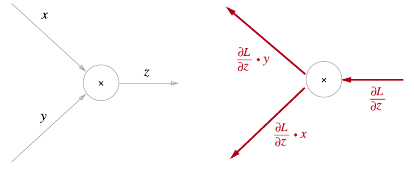

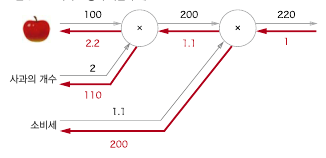

In [2]:
# 모든 레이어는 forward() backward()
# 곱셈계층
class MultipleLayer:
  def __init__(self):
    self.x = None
    self.y = None
  def forward(self,x,y):
    self.x = x
    self.y = y
    out = x * y
    return out
  def backward(self, dout):
    dx = dout*self.y
    dy = dout*self.x
    return dx,dy

In [4]:
# 계층
app_layer = MultipleLayer()
tax_layer = MultipleLayer()

apple = 100
apple_count = 2
tax = 1.1

# 순전파
app_price = app_layer.forward(apple,apple_count)
price = tax_layer.forward(app_price,tax)
price

220.00000000000003

In [5]:
# 역전파
dout = 1
dapple,dtax = tax_layer.backward(dout)
dapple,dtax

(1.1, 200)

In [6]:
dapple,dapple_num =  app_layer.backward(dapple)
dapple,dapple_num

(2.2, 110.00000000000001)

덧셈 계층

In [8]:
class AddLayer:
  def __init__(self):
    pass
  def forward(self,x,y):
    out = x + y
    return out
  def backward(self, dout):
    dx = dout*1
    dy = dout*1
    return dx,dy

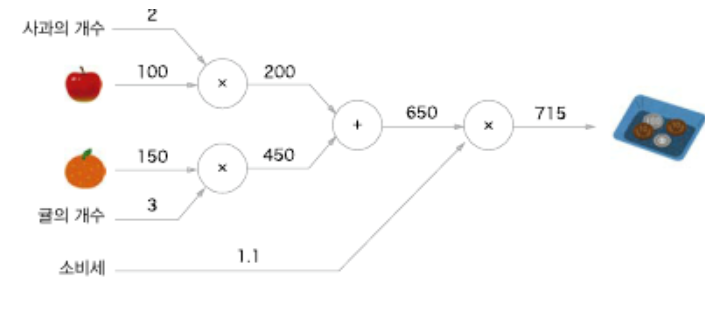

In [11]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

#layer
apple_layer = MultipleLayer()
orange_layer = MultipleLayer()
ao_layer = AddLayer()
tax_layer = MultipleLayer()

# 순전파
apple_price = apple_layer.forward(apple_num, apple)
orange_price = orange_layer.forward(orange, orange_num)
pre_price =  ao_layer.forward(apple_price,orange_price)
price = tax_layer.forward(pre_price,tax)
print(price)

#역전파
dprice = 1
dx1,dy1 =  tax_layer.backward(dprice)
print(dx1,dy1)
dx2,dy2 = ao_layer.backward(dx1)
print(dx2,dy2)
dx3,dy3 =  orange_layer.backward(dy2)
print(dx3,dy3)
dx4,dy4 = apple_layer.backward(dx2)
print(dx4,dy4)


715.0000000000001
1.1 650
1.1 1.1
3.3000000000000003 165.0
110.00000000000001 2.2


활성화 함수
  - Relu

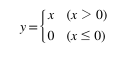

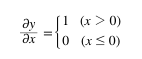

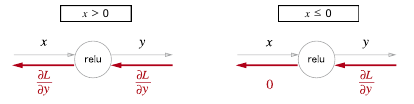

In [12]:
class Relu:
  def __init__(self):
    self.mask = None
  def forward(self,x):
    self.mask = (x<=0)
    out = x.copy()
    out[self.mask] = 0
    return out
  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

Sigmoid 계층 미분 - 계산 그래프

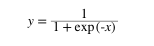


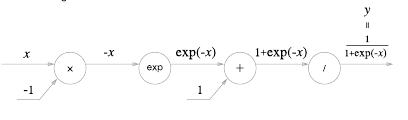

In [13]:
# exp 노드 : y = exp(x)
# / 노드  y = 1/x

In [14]:
# 1 / 노를 미분하면, 순전파의 출력을 제곱한 후 마이너스를 붙인값

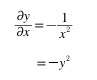

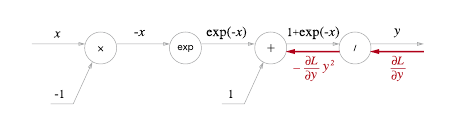

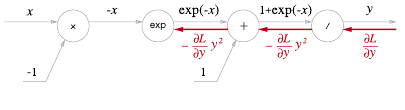

In [ ]:
# y = exp(x) 의 미분은 .. exp 수식을 그대로 계승

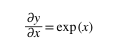

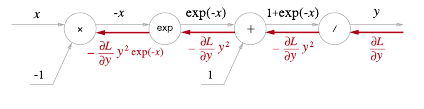

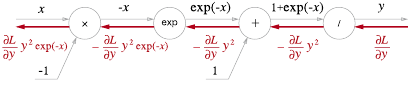

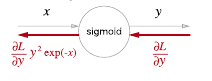

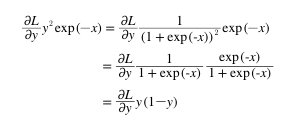

In [15]:
import numpy as np
class Sigmoid:
  def __init__(self):
    self.out = None
  def forward(self, x):
    out = 1 / (1+np.exp(-x))
    self.out = out
  def backward(self,dout):
    dx = dout*self.out*(1-self.out)
    return dx

In [18]:
X = np.random.rand(2)
W = np.random.rand(2,3)
B = np.random.rand(3)
Y = np.dot(X,W)+B

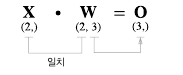

In [19]:
class Affine:
  def __init__(self,W,b):
    self.W = W
    self.b = b
    self.x = None
    self.dw = None
    self.db = None
  def forward(self, x):
    self,x = x
    out = np.dot(x, self.W) + self.b
    return out
  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dw = np.dot(self.x.T, dout)
    self.db = np.sum(dout,axis=0)
    return dx

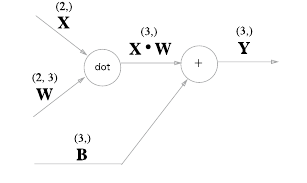

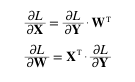

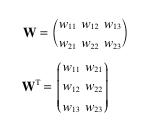

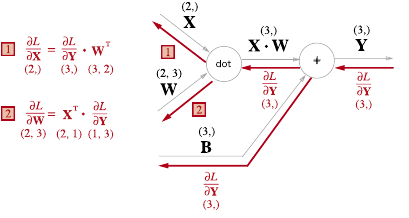